In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
#given this data we have to cluster/group the customers based
#on the amount of money they spend 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
sns.set()

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [11]:
df.std()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Age', ylabel='Density'>

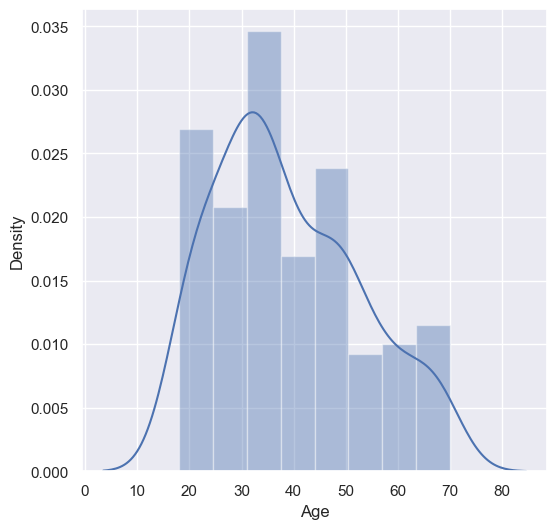

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

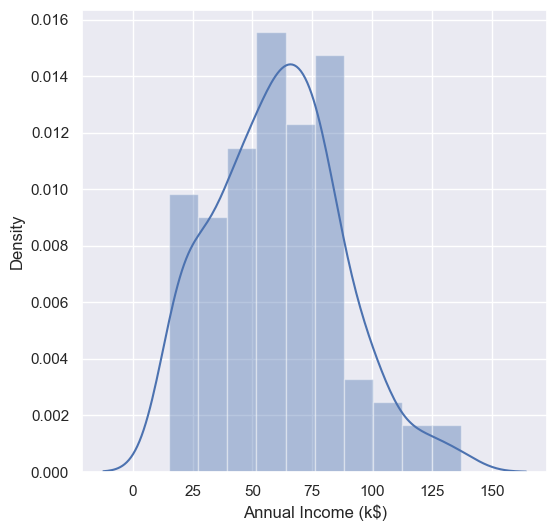

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(df['Annual Income (k$)'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

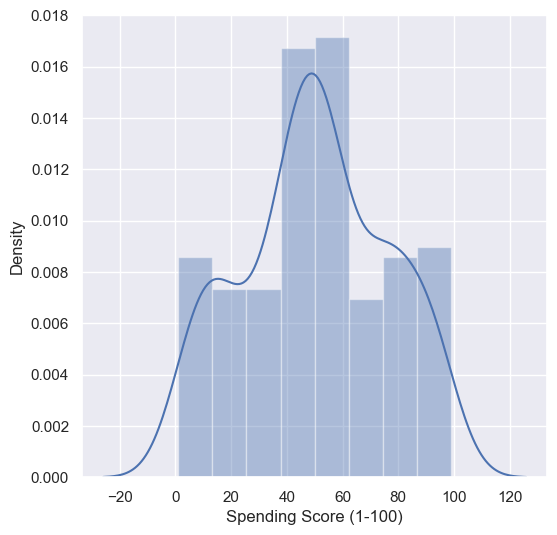

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

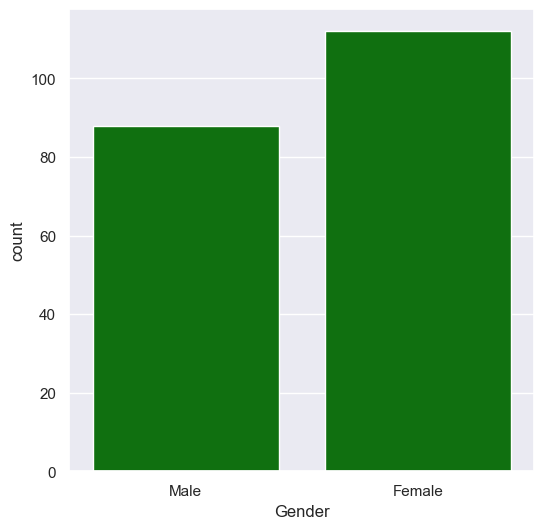

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=df,color='green')

In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
#choosing the annual income and spending score
#here we are taking all the values from he 3rd and
#the 4th column (here indexing starts from 0 even for column)
x=df.iloc[:,[3,4]].values

In [29]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# choosing the no. of clusters
# WCSS- within clusters sum of square
# Finding the WCSS value for different no. of clusters
# which ever has the least value of WCSS we will choose that many clusters

In [40]:
#here we are taking all the clusters from 1 to 10
wcss =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

In [41]:
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.814510710006, 30259.65720728547, 25011.839349156595, 21850.16528258563, 19672.072849014323]


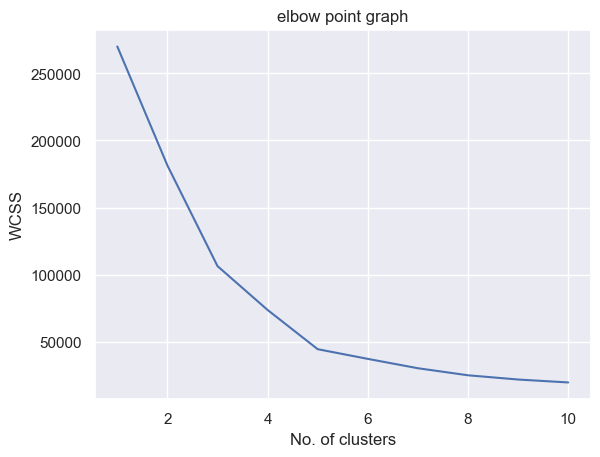

In [42]:
#plotting an elbow graph to see which cluster has the minimum WCSS value
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()
 
#here there are 2 elbow points ie, two drops 
#here the deepest drop is when the no. of clusters are 5
# sooptimum no. of clusters will be 5

# training the k-means clustering model
for k=5

In [43]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=0)

In [55]:
#return a label for each data-point based on their cluster
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


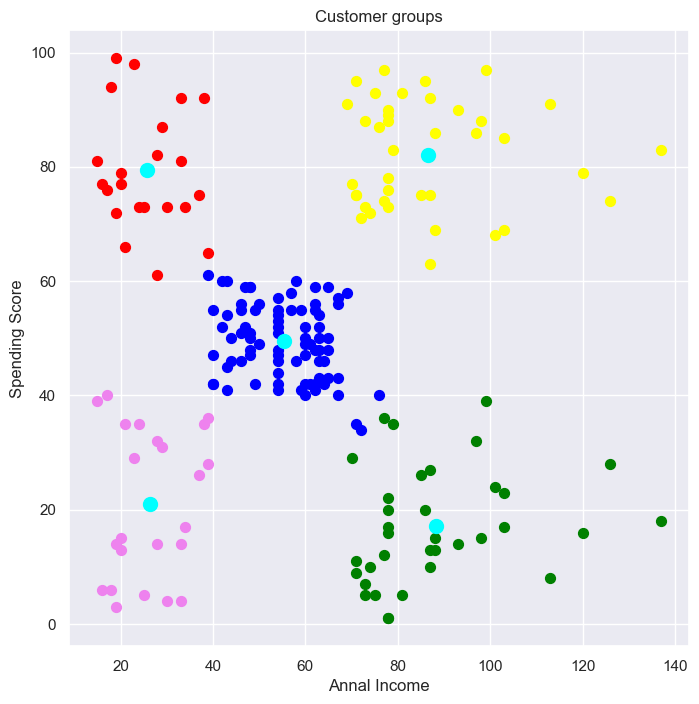

In [58]:
#Visulizing the clusters
#plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='red',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='violet',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title('Customer groups')
plt.xlabel('Annal Income')
plt.ylabel('Spending Score')
plt.show()

# another way to plot the graph

In [53]:
frame=pd.DataFrame({'i':range(1,11),'SSE':wcss})
frame.head()

,i,SSE
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448


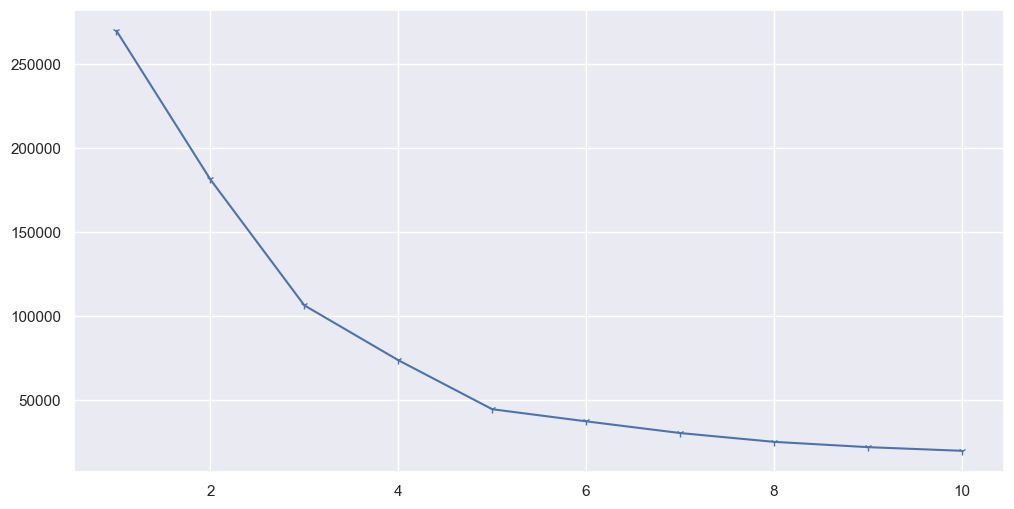

In [59]:
plt.figure(figsize=(12,6))
plt.plot(frame['i'],frame['SSE'],marker="1")
plt.show()